# P2 submission

---

**Requirements**
P2 submission notebook should show :
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.



**Project proposal**

Best breweries in the world 

The idea behind the identification of the best breweries is that the consumer might be more interested to try new and/or original products that come from a good brewery. This ranking is based on the ratings given by the tasters, but the ratings have to be weighted by the number of ratings for the best beers, the quality and emotions transmitted in the text following the different ratings. Some ratings might be biased or unclear so some of them might have to be filtered. Once the ranking is determined a visualisation is to be created to convey properly the attributes of the best breweries (number of “quality” beers, rankings by styles).

*Feedback*

Find and visualize the best breweries - clarity: 75 - creativity: 75 - feasibility: 75, using beer-level reviews as a proxy for brewery reviews is doable, yet will require detailed analysis. 

---

# Beer reviews EDA

This dataset consists of beer reviews from two Beer rating websites: BeerAdvocate and RateBeer, for a period of 17 years ranging from 2001 to 2017.

Metadata about users, beers, and breweries (CSV)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import os
import spacy

# Handle size of the data


TODO : add explanation of the whole process of splitting ratings.txt

In [2]:
def load_txt_file(website):
    if website == 'BeerAdvocate':
        # Specify the directory containing the text files 
        # NB : - need to be outside the repo folder !!
        #      - might need to change the path of the directory below
        directory = './../Processed_datasets/ratings_split_BA/'
    else:
        directory = './../Processed_datasets/ratings_split_RB/'

    # Initialize an empty list to store DataFrames
    dfs = []

    # Loop through the files in reverse order (ratings-5.txt to ratings-1.txt)
    for i in range(1, 0, -1):
        file_name = f'ratings-{i}.txt'
        file_path = os.path.join(directory, file_name)

        with open(file_path, 'r') as f:
            text = f.read()

        # Remove double quotes at the beginning of each line
        data = re.sub('"', '', text)
        data = re.sub(r'^"', '', data, flags=re.MULTILINE)

        # Split the text into individual beer reviews
        beer_reviews = data.split('beer_name')

        # Extract the beer information from each review
        beer_data = []
        for review in beer_reviews:
            beer_info = {}
            for line in [entry.split(':', 1) for entry in review.split('\n') if ':' in entry]:# and 'text' not in entry]:
                if line:  # Check if the list is not empty
                    key, value = line[0].strip(), line[1].strip()
                    beer_info[key] = value
            beer_data.append(beer_info)

        # Convert the beer data into a DataFrame
        df = pd.DataFrame(beer_data)

        # Append the DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    final_df = pd.concat(dfs, ignore_index=True)

    # Rename the columns depending on the website
    if website == 'BeerAdvocate':
        final_df.columns = [
            'beer_name',
            'beer_id',
            'brewery_name',
            'brewery_id',
            'style',
            'abv',
            'date',
            'user_name',
            'user_id',
            'appearance',
            'aroma',
            'palate',
            'taste',
            'overall',
            'rating',
            'text',
            'review'] # additional column compared to RB
    else:
        final_df.columns = [
            'beer_name',
            'beer_id',
            'brewery_name',
            'brewery_id',
            'style',
            'abv',
            'date',
            'user_name',
            'user_id',
            'appearance',
            'aroma',
            'palate',
            'taste',
            'overall',
            'rating',
            'text']
    return final_df

def sample_data(df, ratio):
    # sample the data to make it even smaller
    return df.sample(frac = ratio, random_state=42)

In [3]:
# Load data
ratings_BA = load_txt_file('BeerAdvocate')
ratings_RB = load_txt_file('RateBeer')

In [4]:
# Sample data to make it even smaller AND RANDOMIZED (not randomized in the initial txt splitting process)
ratings_BA = sample_data(ratings_BA, 1)
ratings_RB = sample_data(df = ratings_RB, ratio = 1)

In [5]:
print(len(ratings_BA))
ratings_BA.head(2)

444339


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
43736,"Hello, My Name Is Ingrid",67199,BrewDog,16315,American Double / Imperial IPA,8.2,1370426400,aztraz,aztraz.671249,nan,nan,nan,nan,nan,3.50,nan,False
273843,Solstice D'été Aux Cerises,73716,Brasserie Dieu du Ciel!,1141,Berliner Weissbier,6.5,1444644000,hopsolutely,hopsolutely.513175,4.0,4.0,3.5,4.0,3.75,3.90,Enjoying with thanks to Phyl21ca.Rarely does a...,True


In [6]:
print(len(ratings_RB))
ratings_RB.head(2)

446795


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
262500,Brew Brothers Prairie Berry Ale,21927,Brew Brothers Brewing &#40;Alberta&#41;,3033,Fruit Beer,5.5,1044615600,presario,5348,3,6,3,7,13,3.20,Big blue 1L bottle. Very loud pop announced t...
39881,Ed Hardy Premium Beer,110849,Cervecería Mexicana (Grupo Modelo),5973,Pale Lager,4.6,1281520800,Cajun,47922,2,4,2,3,5,1.60,Tasting - Gulf Brew 2010 - Pale amber white he...


### Load the other data

A enlever surement....

In [7]:
# BeerAdvocate
beers_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/beers.csv")
breweries_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/breweries.csv")
users_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/users.csv")

# RateBeer
beers_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/beers.csv")
breweries_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/breweries.csv")
users_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/users.csv")

# matched_beer_data
beers_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/beers.csv", header=1)
breweries_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/breweries.csv", header = 1)
ratings_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/ratings.csv", header=1)
users_approx = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users_approx.csv", header=1)
users_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users.csv", header=1)

## EDA

Do univariate and multivariate analysis


- formats
- distributions
- missing values
- correlations
- etc...

**Organisation of the EDA**
- General data (users, breweries)
- Numerical ratings
- Textual reviews

In [8]:
def convert_type(df, col):
    df[col] = df[col].astype('float64')
    return df

cols = ['beer_id', 'brewery_id', 'abv', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

for col in cols :
    ratings_BA = convert_type(ratings_BA, col)

for col in cols :
    ratings_RB = convert_type(ratings_RB, col)

In [9]:
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
                   
    """
    numerical = df.describe(include=['float64', 'int64'])
    categorical = df.describe(include=['object'])
    stats = pd.concat([numerical, categorical])
    
    # Select the desired statistics
    stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
    percentage = df.isnull().sum(axis=0) * 100 / len(df)
    stats.loc['missing_values'] = np.array(percentage)

    return stats

ratings_BA_stats = get_feature_stats(ratings_BA)
ratings_RB_stats = get_feature_stats(ratings_RB)

In [10]:
ratings_BA_stats

,beer_id,brewery_id,abv,appearance,aroma,palate,taste,overall,rating,beer_name,brewery_name,style,date,user_name,user_id,text,review
mean,49930.822187,7393.904217,6.283523,3.763298,3.662354,3.670929,3.713133,3.724937,3.676796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,64384.554923,10963.761690,2.314747,0.620217,0.684314,0.672210,0.703822,0.681856,0.690097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,21163.000000,853.000000,5.400000,4.000000,3.750000,3.750000,3.750000,4.000000,3.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22878,1947,104,5809,39863,39863,196394,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Fin Du Monde,Unibroue,English Pale Ale,1498730400,Sammy,sammy.3853,nan,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10046,37472,31061,628,3833,3833,247685,254214
missing_values,0.000225,0.000450,0.000450,0.000450,0.000450,0.783636,0.000450,0.000450,0.000450,36.780926,36.780926,36.780926,36.780926,36.780926,0.00045,0.00045,0.00045


In [11]:
ratings_RB_stats

,beer_id,brewery_id,abv,appearance,aroma,palate,taste,overall,rating,beer_name,brewery_name,style,date,user_name,user_id,text
mean,143633.215959,6031.760075,6.134699,3.271936,6.057893,3.071982,6.139671,12.431072,3.097255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,145026.596254,7227.842634,1.851008,0.835354,1.759857,0.851453,1.730788,3.602640,0.793646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,95677.000000,2244.000000,5.500000,3.000000,6.000000,3.000000,6.000000,13.000000,3.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30957,1940,89,6089,16554,16551,445825
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Corona Extra,Unibroue &#40;Sapporo&#41;,Pale Lager,1419764400,Lubiere,5855,~This review was made some time ago via anothe...
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3650,28394,62348,298,5320,5320,71
missing_values,0.000224,0.000224,0.000224,0.000224,0.000224,2.530243,0.000448,0.000448,0.000448,0.000448,0.000448,0.000448,0.000448,0.000448,0.000448,0.000448


In [12]:
def plot_features(df, title, normalize=False):
    continuous_cols = ['abv', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating'] #list(df._get_numeric_data().columns)
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    for i, col in enumerate(continuous_cols):
        ax = axes[i // 4, i % 4]
        data = df[~df[col].isna()]
        sns.histplot(data=data[col], bins=50, ax=ax) #Filter out nan values in the features
        ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels by 45 degrees
    fig.suptitle(title)
    fig.tight_layout()

    return plt

# plot_features(ratings_BA, "Distribution of numerical features")
# plot_features(ratings_RB, "Distribution of numerical features")
# plt.show()


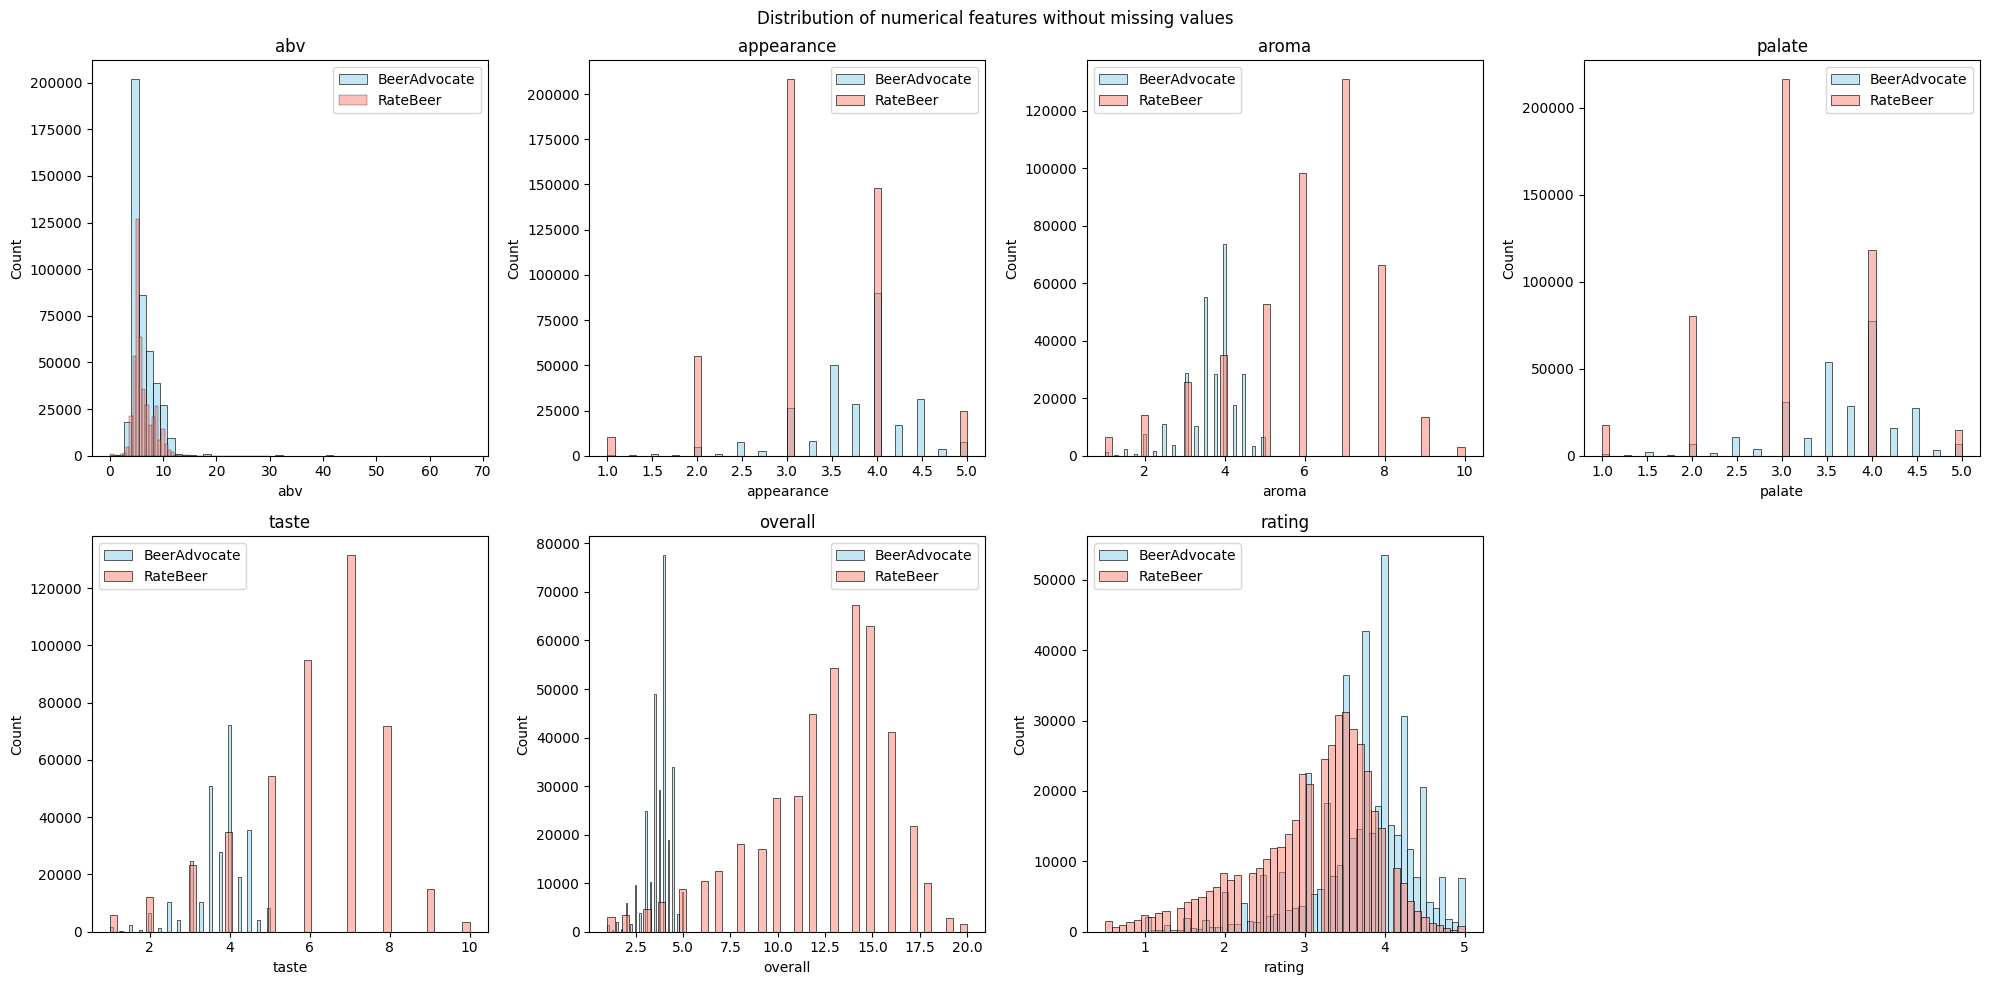

In [13]:
def plot_features(df1, df2, title):
    continuous_cols = ['abv', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    fig.delaxes(axes[1, 3])
    for i, col in enumerate(continuous_cols):
        ax = axes[i // 4, i % 4]
        sns.histplot(data=df1[~df1[col].isna()], x=col, bins=50, ax=ax, color='skyblue', alpha=0.5, label='BeerAdvocate')
        sns.histplot(data=df2[~df2[col].isna()], x=col, bins=50, ax=ax, color='salmon', alpha=0.5, label='RateBeer')
        ax.set_title(col)
        ax.legend()
    fig.suptitle(title)
    fig.tight_layout()
    return fig

# Assuming ratings_BA and ratings_RB are DataFrames with the same columns
fig = plot_features(ratings_BA, ratings_RB, "Distribution of numerical features without missing values")
plt.show()

This mosaique plots highlights the differences in the notation between the two websites. Especially in teh appearance and palate categories: RateBeer users are not allowed to put non integer values. This is not the case for BeerAdvocate users. This is why the distribution of the RateBeer ratings is more discrete than the BeerAdvocate one.
One another side, the overall ratings in RateBeer and BeerAdvocate are not on the same scales: 5-scale for BeerAdvocate and 20-scale for RateBeer.

Later on in this notebooks, the values will be normalized for better comparison.

In [14]:
def get_missing_value_info(df, threshold=100):
    """
    Obtains the number of missing values for each feature and the percentage
    of missing values.
    
    Parameters
    ----------
    df : DataFrame
        Containing all data
    threshold : float, optional
             The maximum percentage of missing values allowed. Default is 5.

    Returns
    -------
    missing : DataFrame
            Containing the number of missing values and the percentage of 
            missing values for each feature where the percentage of missing
            values is under the threshold.
                
    """
    missing = df.isnull().sum(axis=0)
    missing = pd.DataFrame(missing, columns=['missing_values'])
    missing['percentage'] = missing['missing_values'] * 100 / len(df)
    missing = missing[missing['percentage'] < threshold]
    missing.sort_values(by='percentage', ascending=False, inplace=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(missing.index, missing['percentage'])
    ax.set_xticklabels(missing.index, rotation=45)
    ax.set_ylabel('Percenatge of missing values')
    ax.set_title('Missing values per feature')
    plt.show()

/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_13236/1596008911.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing.index, rotation=45)


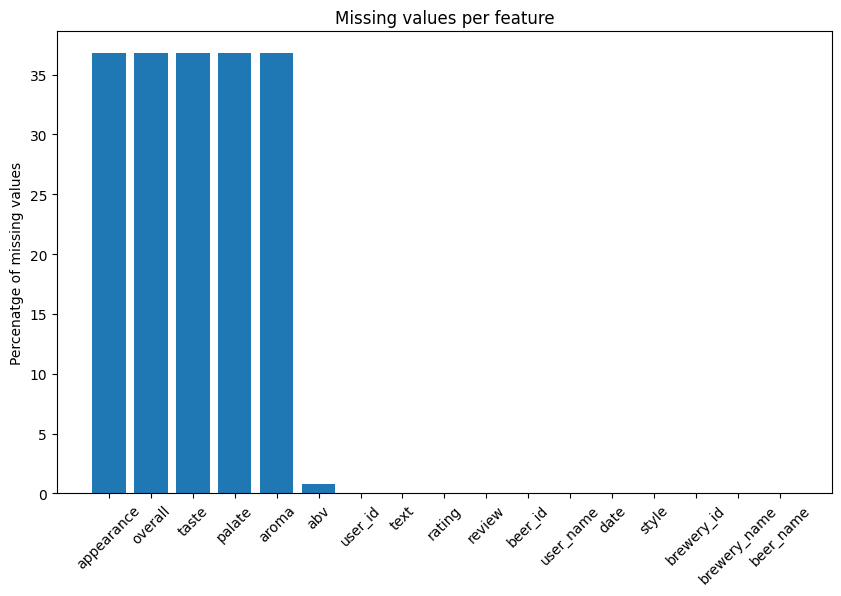

/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_13236/1596008911.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing.index, rotation=45)


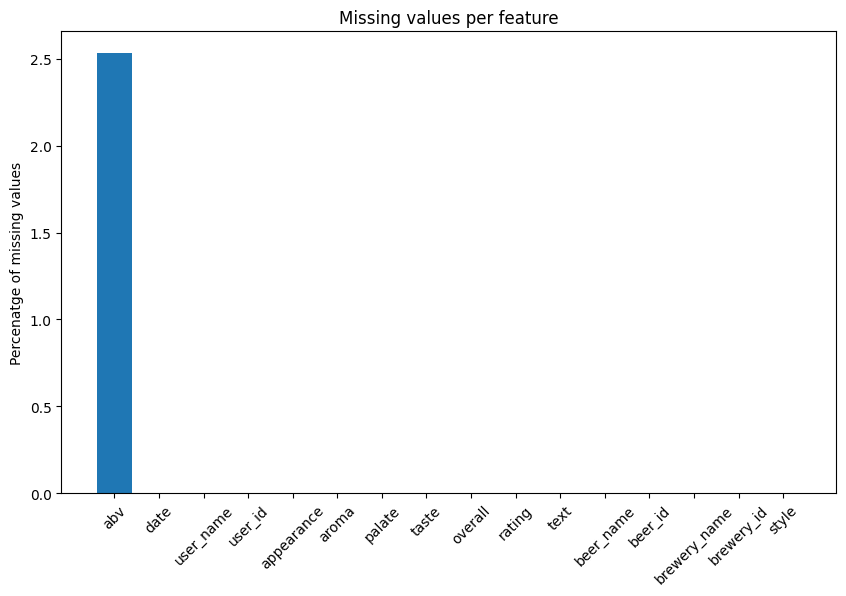

In [15]:
get_missing_value_info(ratings_BA)
get_missing_value_info(ratings_RB)

In [16]:
def calculate_correlations(df1, df2):
        """
        Calculates the correlation between all numerical features.
        
        Parameters
        ----------
        df1 : DataFrame
                First dataframe containing all data
        df2 : DataFrame
                Second dataframe containing all data

        Returns
        -------
        None
        """
        numerical_cols1 = df1.select_dtypes(include=['float64', 'int64']).columns
        corr1 = df1[numerical_cols1].corr()

        numerical_cols2 = df2.select_dtypes(include=['float64', 'int64']).columns
        corr2 = df2[numerical_cols2].corr()

        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        sns.heatmap(corr1, annot=True, ax=axes[0])
        sns.heatmap(corr2, annot=True, ax=axes[1])
        axes[0].set_title('Correlation between numerical features in df1')
        axes[1].set_title('Correlation between numerical features in df2')
        plt.show()


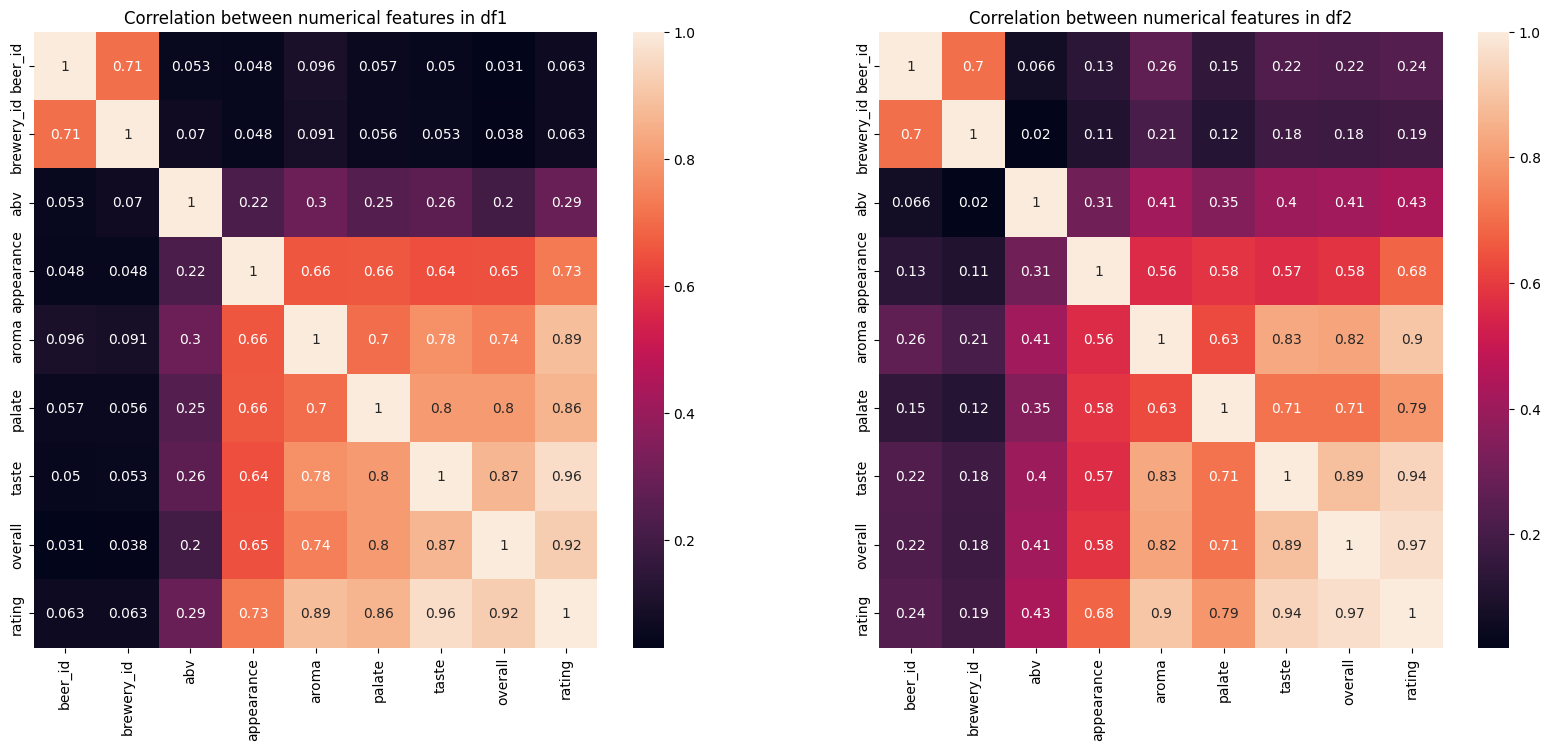

In [17]:
calculate_correlations(ratings_BA, ratings_RB)


Performing correlation heklp having a better understanding of the beer rating. The lower right areas of the matrices look warmer, translating a high correlation between features. Looking a the rating, from the matrices one can see that a beer rater tends to put high rate scores to tastier, and more complex beers.

On difference is that between the 2 websites the correlations are different specially in the apperance where BeerAdvocate users look like they are more fucsed towards it when rating the beverage.

Side note: beer_id brewery_id correlation ????

To go deeper in understanding the correlation, we can look at the joint distribution for the correlated features.

In [18]:
def clipp_df_for_high_corr(df):
    # Select only the numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    corr = df[numerical_cols].corr()

    # Select the features with a correlation above 0.5, excluding columns with "id" in their name
    high_corr_cols = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > 0.5:
                colname = corr.columns[i]
                if "id" not in colname:
                    high_corr_cols.append(colname)

    # Drop the features with a correlation below 0.5
    high_corr_cols = list(set(high_corr_cols))
    df_high_corr = df[high_corr_cols]

    return df_high_corr


In [19]:
ratings_BA_correlated = clipp_df_for_high_corr(ratings_BA)
ratings_RB_correlated = clipp_df_for_high_corr(ratings_RB)

Let's study the score in a bit more details and compare between the sites

## Data preprocessing

- enrichment
- filtering
- transformation

In [20]:
def normalize_numerical_data(df):
    """
    Normalizes the numerical features of the DataFrame.
    
    Parameters
    ----------
    df : DataFrame
        Containing all data

    Returns
    -------
    df : DataFrame
        Containing all data with normalized numerical features.
                
    """
    df2 = df.copy()
    numerical = df2._get_numeric_data().columns
    for col in numerical:
        df2[col] = (df2[col] - df2[col].mean()) / df2[col].std()
    return df2

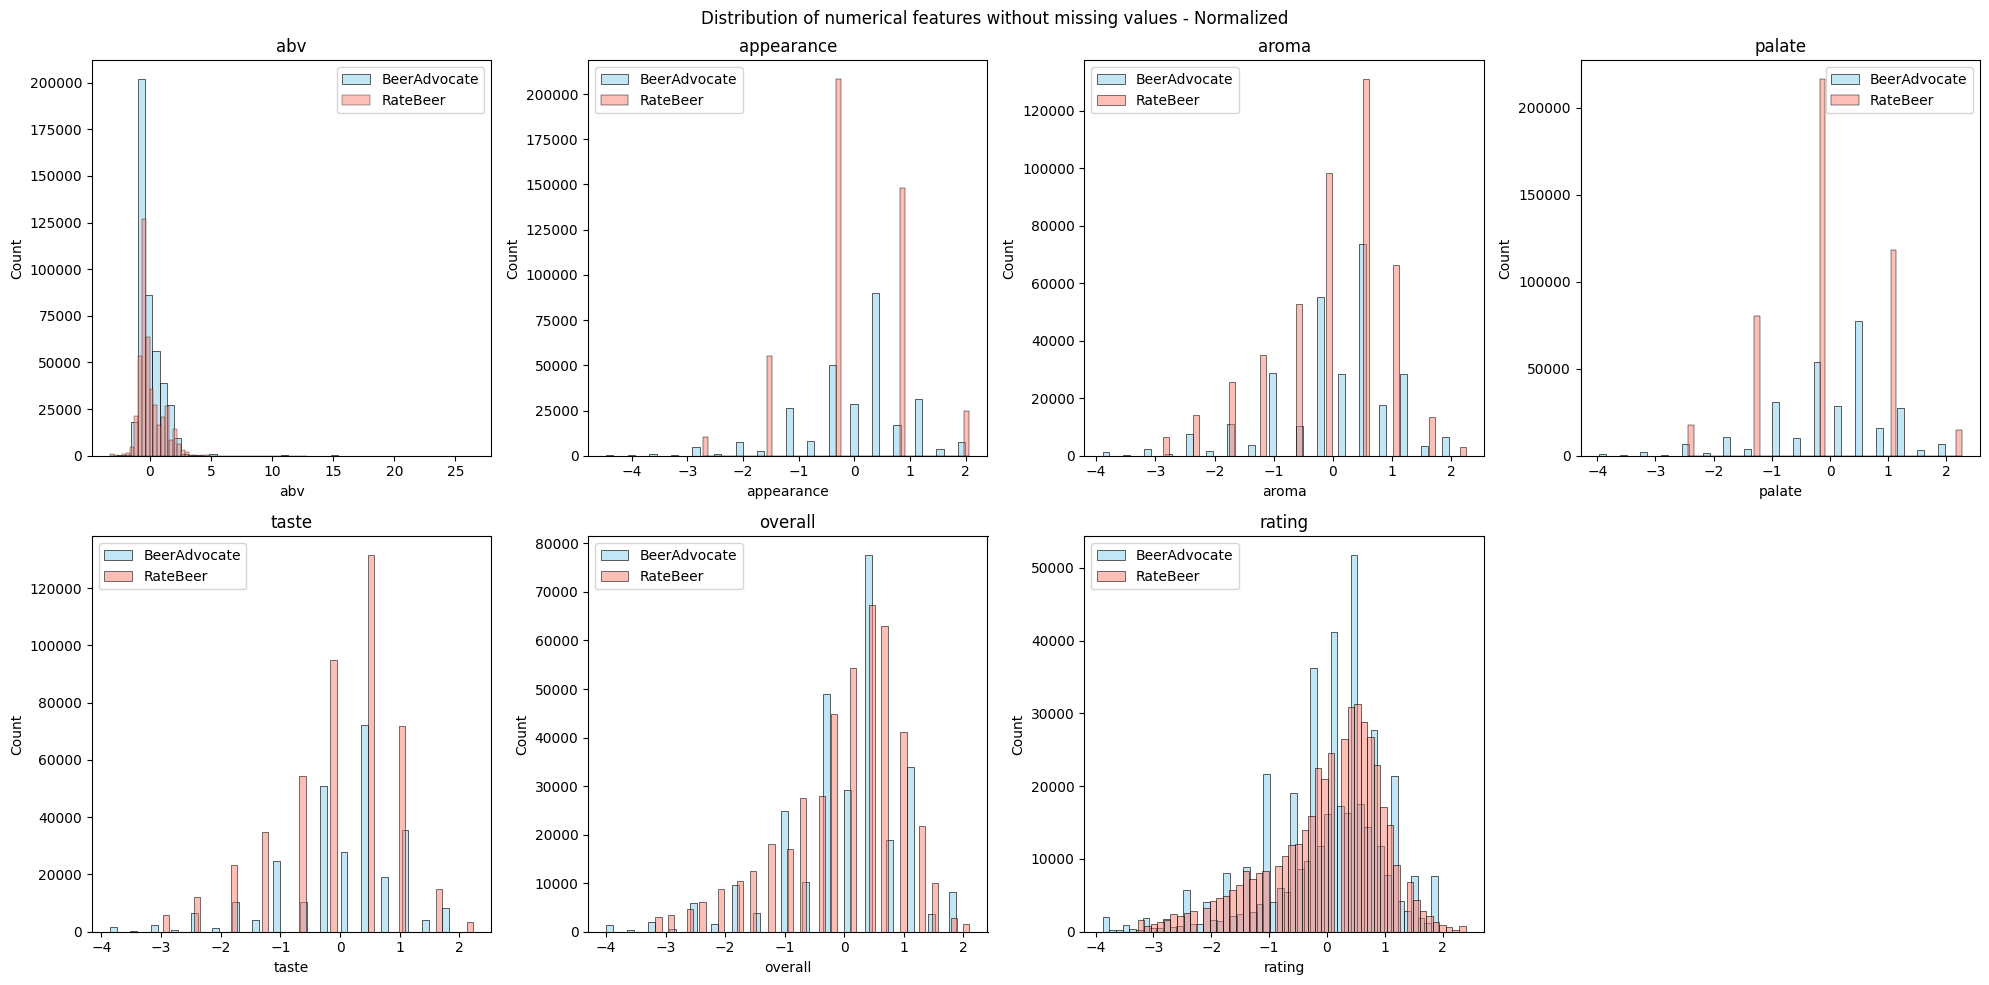

In [21]:
fig = plot_features(normalize_numerical_data(ratings_BA), normalize_numerical_data(ratings_RB), "Distribution of numerical features without missing values - Normalized")

In [22]:
# todo

## Feasibility check of project's methods
- give their essential mathematical details in the notebook.

To asses whether the yearly evolution of the tastes changes, the following plot shows the evolution of the average rating per month along the years

In [23]:
def transform_date(df):
    """
    Transforms the 'date' column of the input DataFrame to a datetime object and extracts the date.
    
    Parameters
    ----------
    df : DataFrame
        The input DataFrame to be transformed.

    Returns
    -------
    df : DataFrame
        The transformed DataFrame.
                
    """
    df_d = df.copy()
    df_d['date'] = pd.to_datetime(df_d['date'], unit='s').dt.date
    return df_d

def create_month_feature(df):
    """
    Creates a new feature 'month' from the 'date' column of the input DataFrame.
    
    Parameters
    ----------
    df : DataFrame
        The input DataFrame to be transformed.

    Returns
    -------
    df : DataFrame
        The transformed DataFrame.
                
    """
    df_m = df.copy()
    df_m['month'] = pd.to_datetime(df_m['date']).dt.month
    return df_m

def plot_rating_versus_month(df1, df2):
    """
    Plots the average rating per month for two dataframes.
    
    Parameters
    ----------
    df1 : DataFrame
        The first input DataFrame to be transformed.
    df2 : DataFrame
        The second input DataFrame to be transformed.

    Returns
    -------
    None
                
    """
    df1_d = transform_date(df1)
    df2_d = transform_date(df2)
    df1_m = create_month_feature(df1_d)
    df2_m = create_month_feature(df2_d)
    df1_m = df1_m.groupby('month')['rating'].agg('mean')
    df2_m = df2_m.groupby('month')['rating'].agg('mean')
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df1_m.index, df1_m.values, label='DataFrame 1')
    ax.plot(df2_m.index, df2_m.values, label='DataFrame 2')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average rating')
    ax.set_title('Average rating per month')
    ax.legend()
    plt.show()


/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_13236/126567905.py:17: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_d['date'] = pd.to_datetime(df_d['date'], unit='s').dt.date
/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_13236/126567905.py:17: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_d['date'] = pd.to_datetime(df_d['date'], unit='s').dt.date


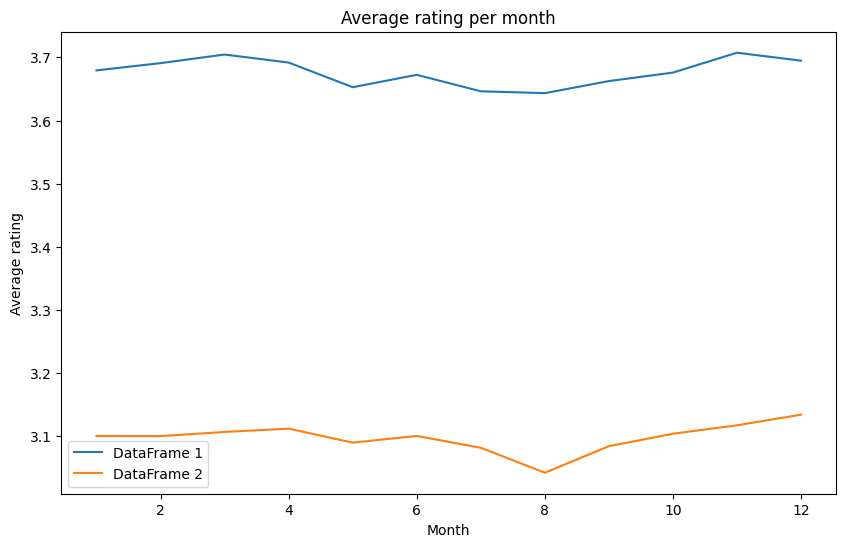

In [24]:
plot_rating_versus_month(ratings_BA, ratings_RB)

In [25]:
def plot_most_consumed_beer_style_per_month(df):
    """
    Plots the most consumed beer style per month.
    
    Parameters
    ----------
    df : DataFrame
        The input DataFrame to be used for plotting.

    Returns
    -------
    None
                
    """
    # group the data by month and beer style
    dated_df = transform_date(df)
    monthed_df = create_month_feature(dated_df)
    df_month_style = monthed_df.groupby(['month', 'style']).size().reset_index(name='count')

    # get the most consumed beer style per month
    idx = df_month_style.groupby(['month'])['count'].transform(max) == df_month_style['count']
    df_most_consumed = df_month_style[idx]

    # plot the most consumed beer style per month
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))
    sns.barplot(x="month", y="count", hue="style", data=df_most_consumed)
    plt.title("Most consumed beer style per month")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.show()


/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_13236/126567905.py:17: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_d['date'] = pd.to_datetime(df_d['date'], unit='s').dt.date
/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_13236/2963815034.py:21: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = df_month_style.groupby(['month'])['count'].transform(max) == df_month_style['count']


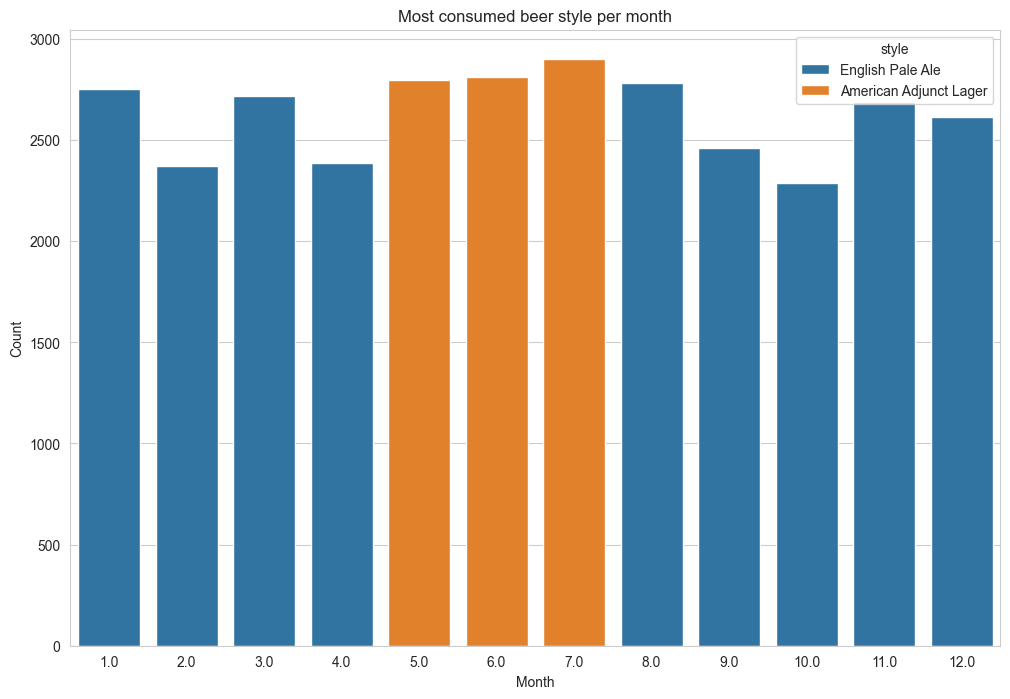

/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_13236/126567905.py:17: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_d['date'] = pd.to_datetime(df_d['date'], unit='s').dt.date
/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_13236/2963815034.py:21: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = df_month_style.groupby(['month'])['count'].transform(max) == df_month_style['count']


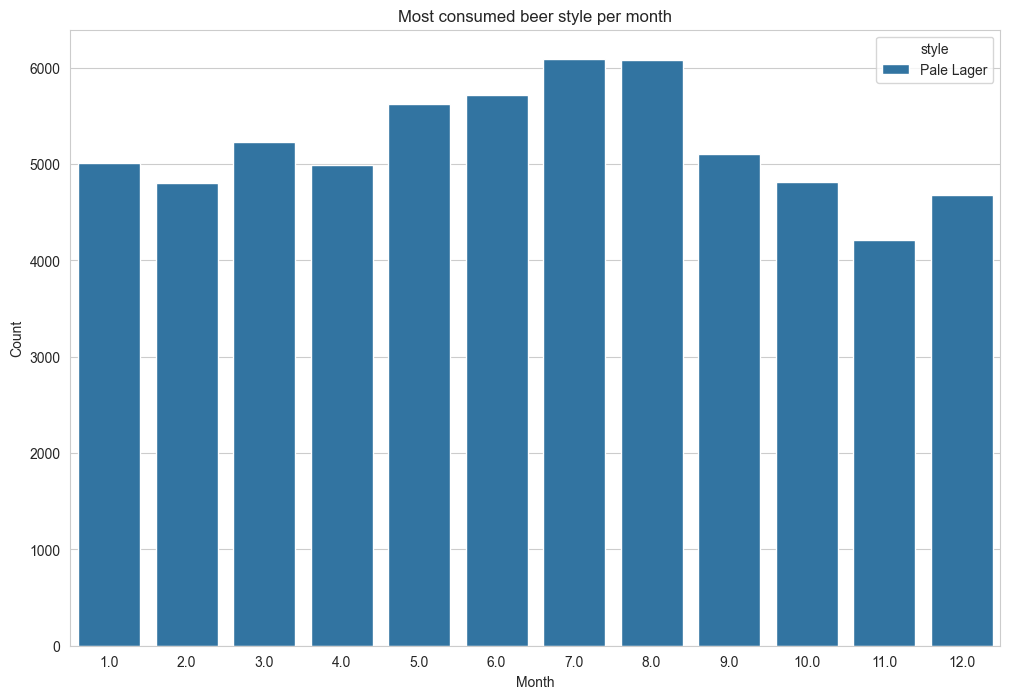

In [26]:
plot_most_consumed_beer_style_per_month(ratings_BA)
plot_most_consumed_beer_style_per_month(ratings_RB)

## Alternatives considered
- analysis and communication is reasonable

In [27]:
# todo